# Predicting Titanic Survival Using Logistic Regression

In [46]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

from logistic_regression import *

pd.set_option('display.max_columns', None)

In [47]:
training_dataframe = pd.read_csv('titanic_training_data.csv')
test_dataframe = pd.read_csv('titanic_test_data.csv')

display(training_dataframe)
display(test_dataframe)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Exploring Data and Creating Graphs for Visualization

In [48]:
all_dataframe = pd.concat([training_dataframe, test_dataframe], axis = 0).reset_index()
all_dataframe = all_dataframe.drop(["index"], axis = 1)
display(all_dataframe)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [49]:
training_dataframe.info()
training_dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
test_dataframe.info()
test_dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


/var/folders/lc/pglrvvjx68x0bqm9722f1brr0000gn/T/ipykernel_30477/2401040839.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  training_correlations = training_dataframe.corr(method="pearson")


<AxesSubplot: >

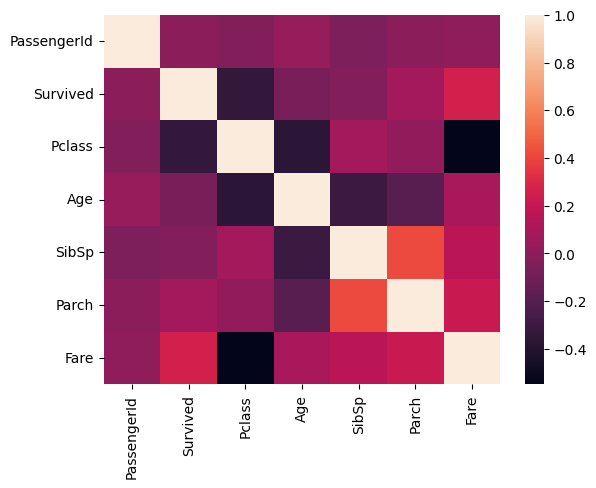

In [51]:
training_correlations = training_dataframe.corr(method="pearson")
sns.heatmap(training_correlations)

## Feature Engineering

### Filling in Missing Ages
We see that there are a variety of missing ages present in this data. Instead of filling any record with a missing age with the median age outright, we will instead fill any missing age with the median age for that class and sex. Thus, for any missing record, we have a much better and more detailed age approximation. See the below image in order to understand what exactly is going on with the 2 lines below.

<div>
<img src="code_explanation_1.png" width="500"/>
</div>

In [52]:
# Finding the Median for each combination of class and sex.
all_dataframe.groupby(["Pclass", "Sex"])["Age"]

# Imputing the missing values for the age column in each record.
all_dataframe["Age"] = all_dataframe.groupby(["Pclass", "Sex"])["Age"].apply(lambda x : x.fillna(x.median()))

/var/folders/lc/pglrvvjx68x0bqm9722f1brr0000gn/T/ipykernel_30477/3773885807.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  all_dataframe["Age"] = all_dataframe.groupby(["Pclass", "Sex"])["Age"].apply(lambda x : x.fillna(x.median()))


### Filling in Missing Fares

It seems as though one fare is missing from the data. While we could replace this missing value with the median fare over all the data, a more detailed approach would be to replace the fare of this passenger with the median fare of passengers like them. For example, if the passenger with the missing fare is in 1st class, we should replace the missing fare with the median of fares of 1st class passengers.

To see what features to consider when determing with subgroup of passengers' median should be used for this passenger, we can look at the correlation chart. Pclass, SibSp, and Parch are correlated with Fare, so let's use those columns.

In [53]:
# Finding the Fare for each combination of Pclass, SibSp, and Parch. 
all_dataframe.groupby(["Pclass", "SibSp", "Parch"])["Fare"]

# Imputing the missing values for the age column in each record.
all_dataframe["Fare"] = all_dataframe.groupby(["Pclass", "SibSp", "Parch"])["Fare"].apply(lambda x : x.fillna(x.median()))

/var/folders/lc/pglrvvjx68x0bqm9722f1brr0000gn/T/ipykernel_30477/1582576750.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  all_dataframe["Fare"] = all_dataframe.groupby(["Pclass", "SibSp", "Parch"])["Fare"].apply(lambda x : x.fillna(x.median()))


### Filling in Missing Embarkments

There seem to be only 2 missing embarkments. From some research, it is possible to see that both of these passengers got on at the Southampton spot, so we can fill the mising embarkments with S.

In [54]:
all_dataframe["Embarked"] = all_dataframe["Embarked"].fillna("S")

In [55]:
all_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Filling in Missing Cabin Values

In [56]:
all_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
# First, let's see what kind of situation we're dealing with. There are a lot more missing Cabin values than there are filled in Cabin values. 
# This means that we have to approximate the missing Cabin values using the ones we do have. Let's see how the Cabin values we do have correlate with the other features. 

# First, here, we isolate the deck letter for each passenger, and give the passenger the deck 'M' in the case that they do not have any given Cabin.

all_dataframe["Deck"] = all_dataframe["Cabin"].apply(lambda x : x[0] if pd.notnull(x) else "M")
all_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M


In [58]:
# From the following command, we see that there are 9 unique decks, including the placeholder deck 'M' which is used for 

all_dataframe.Deck.describe()

count     1309
unique       9
top          M
freq      1014
Name: Deck, dtype: object

In [59]:
# Let's figure out how many passengers of each class are in each deck, from out of all the passengers where we know their cabin / deck.

hashMap = dict()

decks = sorted(list(set(all_dataframe["Deck"].values)))
classes = sorted(list(set(all_dataframe["Pclass"])))

for deck in decks:
    hashMap[deck] = {}
    for class_ in classes:
        hashMap[deck][class_] = 0

for index, row in all_dataframe[["Pclass", "Deck"]].iterrows():
    hashMap[row.Deck][row.Pclass] = hashMap[row.Deck][row.Pclass] + 1

display(hashMap)

{'A': {1: 22, 2: 0, 3: 0},
 'B': {1: 65, 2: 0, 3: 0},
 'C': {1: 94, 2: 0, 3: 0},
 'D': {1: 40, 2: 6, 3: 0},
 'E': {1: 34, 2: 4, 3: 3},
 'F': {1: 0, 2: 13, 3: 8},
 'G': {1: 0, 2: 0, 3: 5},
 'M': {1: 67, 2: 254, 3: 693},
 'T': {1: 1, 2: 0, 3: 0}}

In [60]:
# For now, we will leave deck M in the dataset as its own deck, representing any record with a missing cabin.
# We can now drop the column Cabin as it is no longer necessary.
all_dataframe = all_dataframe.drop(["Cabin"], axis = 1)

### Getting Title of Each Passenger

We know that there is a Name column in the dataset. Unfortunately, it is not numerical or categorical and thus is difficult to use in any meaningful capacity by itself. We can make use of the Name column by extracting the title (Mr., Ms., etc..) and seeing what correlation each title has with survival rate.

In [61]:
all_dataframe["Title"] = all_dataframe["Name"].apply(lambda x : re.search(r' ([a-zA-z0-9]*)\. ', x)[1])

display(all_dataframe)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,M,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,M,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,S,M,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,M,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,S,M,Mr


In [62]:
all_dataframe["Title"].describe()
set(list(all_dataframe["Title"].values))

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

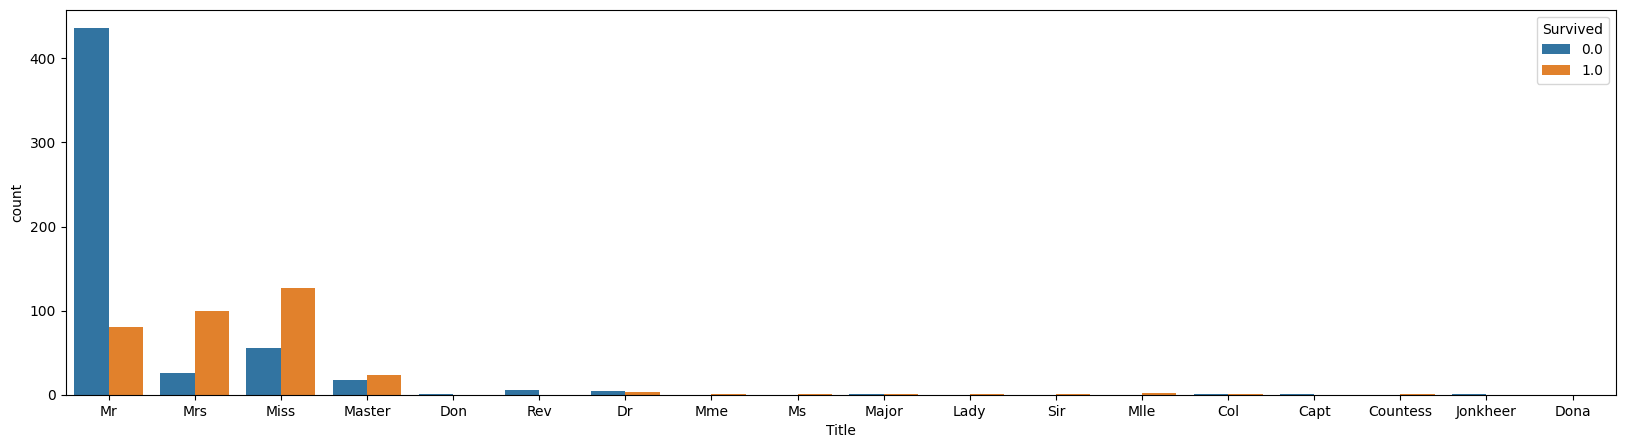

In [63]:
fig, axs = plt.subplots(figsize=(20, 5))
survival_by_titles_plot = sns.countplot(x='Title', hue='Survived', data = all_dataframe)

In [64]:
# We will be one - hot encoding this feature later, and it seems as though there are 18 different titles. 
# Seeing the graph above, we see that certain titles are alike. For example, Mrs, Miss, and Ms, Mlle, Mme, 
# Countess, Dona, and Lady all are female titles. For this reason, we can combine them. Other categories 
# that can be combined are Don, Rev, Dr, Major, Sir, Col, Capt and Jonkheer. The Mr column is very large 
# and thus can stay on its own. The Master column refers to men below the age of 26, and we do not combine 
# this column with Mr because it has a different characteristic and much different survival rate. Because 
# the Master and Mr columns are so different in characteristics, they are not combined and are kept distinct. 

def condense_titles(title):
    if title in ["Mrs", "Miss", "Ms", "Mlle", "Mme", "Countess", "Dona", "Lady"]:
        return "Mrs/Ms/Miss"
    elif title in ["Don", "Rev", "Dr", "Major", "Sir", "Col", "Capt", "Jonkheer"]: 
        return "Don/Dr/Major/Capt"
    else:
        return title

all_dataframe["Title"] = all_dataframe["Title"].apply(condense_titles)

In [65]:
all_dataframe["Title"].describe()

count     1309
unique       4
top         Mr
freq       757
Name: Title, dtype: object

In [66]:
display(all_dataframe)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs/Ms/Miss
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,M,Mrs/Ms/Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,Mrs/Ms/Miss
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,M,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,S,M,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Mrs/Ms/Miss
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,M,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,S,M,Mr


### Finding and Bucketizing Family Size 

In [67]:
# First, we will determine the family size for each passenger.

all_dataframe["Family_Size"] = all_dataframe["SibSp"] + all_dataframe["Parch"] + 1

In [68]:
display(all_dataframe)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M,Mr,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs/Ms/Miss,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,M,Mrs/Ms/Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,Mrs/Ms/Miss,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,M,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,S,M,Mr,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Mrs/Ms/Miss,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,M,Mr,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,S,M,Mr,1


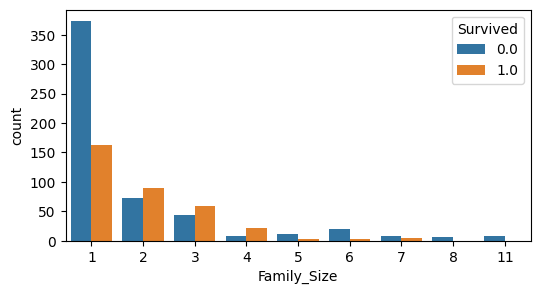

In [69]:
fig, axs = plt.subplots(figsize=(6, 3))
survival_by_family_size_plot = sns.countplot(x='Family_Size', hue='Survived', data = all_dataframe)

In [70]:
def categorical_family_size(size):
    if size == 1:
        return "Solo"
    elif 2 <= size <= 4:
        return "Small"
    elif 5 <= size <= 7:
        return "Medium"
    else:
        return "Large"

all_dataframe["Family_Size_Categorical"] = all_dataframe["Family_Size"].apply(categorical_family_size)
display(all_dataframe)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title,Family_Size,Family_Size_Categorical
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M,Mr,2,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs/Ms/Miss,2,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,M,Mrs/Ms/Miss,1,Solo
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,Mrs/Ms/Miss,2,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,M,Mr,1,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,S,M,Mr,1,Solo
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Mrs/Ms/Miss,1,Solo
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,M,Mr,1,Solo
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,S,M,Mr,1,Solo


### Finding Family Survival Rate Per Passenger

In [71]:
# Isolating the Family Name of Each Passenger Into Its Own Column in the Dataframe

def find_family_name(name):
    return re.search(r'([a-zA-Z0-9]*)\, ', name)[1]

all_dataframe["Family_Name"] = all_dataframe["Name"].apply(find_family_name)
training_dataframe["Family_Name"] = training_dataframe["Name"].apply(find_family_name)
test_dataframe["Family_Name"] = test_dataframe["Name"].apply(find_family_name)

display(all_dataframe)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title,Family_Size,Family_Size_Categorical,Family_Name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M,Mr,2,Small,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs/Ms/Miss,2,Small,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,M,Mrs/Ms/Miss,1,Solo,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,Mrs/Ms/Miss,2,Small,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,M,Mr,1,Solo,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,S,M,Mr,1,Solo,Spector
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Mrs/Ms/Miss,1,Solo,Ocana
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,M,Mr,1,Solo,Saether
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,S,M,Mr,1,Solo,Ware


In [72]:
# Some Statistics
num_unique_family_names = len(all_dataframe["Family_Name"].unique())

print("Number of Unique Family Names: " + str(num_unique_family_names))

Number of Unique Family Names: 872


##### Conditions 
Note that we can only calculate the Family_Survival_Rate from the members of some family that are present in the training set, as we have the data regarding whether they survived. 

(1) Passenger has Family in the training set and the test set --> 
- Family_Survival_Rate should have the actual family survival rate calculated from training set

(2) Passenger has Family in the test set but not the training set --> 
- Family_Survival_Rate should be NaN at first. Then, one possible idea is to set Family_Survival_Rate to the average family survival rate from (1).

(3) Passenger has Family in the training set but not the test set --> 
- Family_Survival_Rate should have the actual family survival rate set as calculated from the training set

(4) Passenger has No Family on board the Titanic --> 
- Family_Survival_Rate should have the mean survival rate amongst all passengers without family in the training set?

In [73]:
family_survival_rates = dict()

# Finding Number of Family Members per Family Name
num_family_per_family_name = all_dataframe.groupby(["Family_Name"]).count()["PassengerId"]
display(num_family_per_family_name)

print("Total Number of Families: " + str(len(num_family_per_family_name)) + "\n")

# Condition (1)
family_names_condition_1 = []

for family_name in training_dataframe["Family_Name"].unique():
    if family_name in test_dataframe["Family_Name"].unique() and (num_family_per_family_name[family_name] > 1):
        family_names_condition_1.append(family_name)

print("Number of Family Names in Training and Test (Condition 1): " + str(len(family_names_condition_1)))

# Condition (2) 
family_names_condition_2 = []

for family_name in test_dataframe["Family_Name"].unique():
    if (family_name not in training_dataframe["Family_Name"]) and (num_family_per_family_name[family_name] > 1):
        if family_name not in family_names_condition_1:
            family_names_condition_2.append(family_name)

print("Number of Family Members only in Test Set (Condition 2): " + str(len(family_names_condition_2)))

# Condition (3)
family_names_condition_3 = []

for family_name in training_dataframe["Family_Name"].unique():
    if (family_name not in test_dataframe["Family_Name"]) and (num_family_per_family_name[family_name] > 1):
        if family_name not in family_names_condition_1:
            family_names_condition_3.append(family_name)

print("Number of Family Members only in Training Set (Condition 3): " + str(len(family_names_condition_3)))

# Condition (4)
family_names_condition_4 = []

for family_name in num_family_per_family_name.items():
    if family_name[1] == 1:
        family_names_condition_4.append(family_name[0])

print("Number of Passengers with no Family Members on the Boat (Condition 4): " + str(len(family_names_condition_4)))

print("145 + 18 + 76 + 633 = " + str(145 + 18 + 76 + 633))

Family_Name
Abbing         1
Abbott         3
Abelseth       2
Abelson        2
Abrahamsson    1
              ..
Yrois          1
Zabour         2
Zakarian       2
Zimmerman      1
hoef           1
Name: PassengerId, Length: 872, dtype: int64

Total Number of Families: 872

Number of Family Names in Training and Test (Condition 1): 145
Number of Family Members only in Test Set (Condition 2): 18
Number of Family Members only in Training Set (Condition 3): 76
Number of Passengers with no Family Members on the Boat (Condition 4): 633
145 + 18 + 76 + 633 = 872


In [74]:
# Calculating Family Survival Rates

average_family_survival_rate = 0

# Condition 1
for row in training_dataframe.groupby(["Family_Name"]).mean()["Survived"].items():
    if row[0] in family_names_condition_1:
        family_survival_rates[row[0]] = row[1]
        average_family_survival_rate += 1

# Condition 3
for row in training_dataframe.groupby(["Family_Name"]).mean()["Survived"].items():
    if row[0] in family_names_condition_3:
        family_survival_rates[row[0]] = row[1]
        average_family_survival_rate += 1

average_family_survival_rate = average_family_survival_rate / (int(len(family_names_condition_1)) + int(len(family_names_condition_3)))

# Condition 2
for family_name in family_names_condition_2:
    family_survival_rates[family_name] = average_family_survival_rate

# Condition 4
mean_survival_rate = training_dataframe.mean()["Survived"]

for family_name in family_names_condition_4:
    family_survival_rates[family_name] = mean_survival_rate

/var/folders/lc/pglrvvjx68x0bqm9722f1brr0000gn/T/ipykernel_30477/2007446390.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  for row in training_dataframe.groupby(["Family_Name"]).mean()["Survived"].items():
/var/folders/lc/pglrvvjx68x0bqm9722f1brr0000gn/T/ipykernel_30477/2007446390.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  for row in training_dataframe.groupby(["Family_Name"]).mean()["Survived"].items():
/var/folders/lc/pglrvvjx68x0bqm9722f1brr0000gn/T/ipykernel_30477/2007446390.py:24: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it wi

In [75]:
def getFamilySurvivalRate(name):
    return family_survival_rates[name]

all_dataframe["Family_Survival_Rate"] = all_dataframe["Family_Name"].apply(getFamilySurvivalRate)

display(all_dataframe["Family_Survival_Rate"])

0       0.000000
1       1.000000
2       0.383838
3       0.500000
4       0.500000
          ...   
1304    0.383838
1305    0.383838
1306    0.383838
1307    1.000000
1308    1.000000
Name: Family_Survival_Rate, Length: 1309, dtype: float64

In [76]:
def getFamilySurvivalRateNA(name):
    if name in family_names_condition_2:
        return 1
    else:
        return 0

all_dataframe["Family_Survival_Rate_NA"] = all_dataframe["Family_Name"].apply(getFamilySurvivalRateNA)

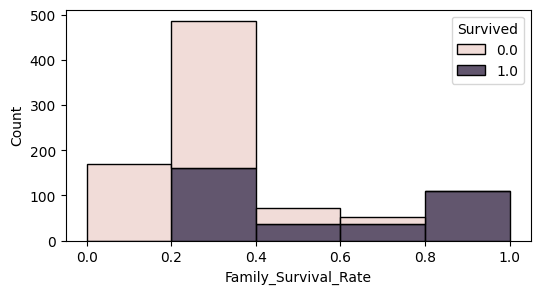

In [77]:
fig, axs = plt.subplots(figsize=(6, 3))
survival_by_family_size_plot = sns.histplot(x='Family_Survival_Rate', hue='Survived', data = all_dataframe, bins = 5, multiple = "stack")

In [78]:
def family_survival_rate_bucketized(family_survival_rate):
    if 0 <= family_survival_rate <= 0.2:
        return 1
    elif 0.2 <= family_survival_rate < 0.4:
        return 2
    elif 0.4 <= family_survival_rate < 0.6:
        return 3
    elif 0.6 <= family_survival_rate < 0.8:
        return 4
    else:
        return 5

all_dataframe["Family_Survival_Rate_Categorical"] = all_dataframe["Family_Survival_Rate"].apply(family_survival_rate_bucketized)

display(all_dataframe)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title,Family_Size,Family_Size_Categorical,Family_Name,Family_Survival_Rate,Family_Survival_Rate_NA,Family_Survival_Rate_Categorical
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M,Mr,2,Small,Braund,0.000000,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs/Ms/Miss,2,Small,Cumings,1.000000,0,5
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,M,Mrs/Ms/Miss,1,Solo,Heikkinen,0.383838,0,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,Mrs/Ms/Miss,2,Small,Futrelle,0.500000,0,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,M,Mr,1,Solo,Allen,0.500000,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,S,M,Mr,1,Solo,Spector,0.383838,0,2
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Mrs/Ms/Miss,1,Solo,Ocana,0.383838,0,2
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,M,Mr,1,Solo,Saether,0.383838,0,2
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,S,M,Mr,1,Solo,Ware,1.000000,1,5


## Applying Logistic Regression Model

In [79]:
# One - Hot Encoding
# all_dataframe = pd.get_dummies(data = all_dataframe, columns = ["Sex", "Embarked", "Deck", "Title", "Family_Size_Categorical", "Family_Survival_Rate_Categorical"])
all_dataframe = pd.get_dummies(data = all_dataframe, columns = ["Sex", "Embarked", "Deck", "Title", "Family_Size_Categorical"])

In [80]:
# Moving Output Column to the End of the Python Pandas Dataframe
survived = all_dataframe.pop("Survived")
all_dataframe.insert(len(all_dataframe.columns), "Survived", survived)

In [81]:
training_dataframe = all_dataframe.iloc[:891]
training_dataframe = training_dataframe.drop(["PassengerId", "Family_Size", "Name", "Ticket", "Family_Name", "SibSp", "Parch", "Family_Survival_Rate_Categorical"], axis = 1)
display(training_dataframe)

test_dataframe = all_dataframe.iloc[891:]

# Isolating ids from the dataset
ids = test_dataframe["PassengerId"]

test_dataframe = test_dataframe.drop(["Survived", "PassengerId", "Family_Size", "Name", "Ticket", "Family_Name", "SibSp", "Parch", "Family_Survival_Rate_Categorical"], axis = 1)
display(test_dataframe)

,Pclass,Age,Fare,Family_Survival_Rate,Family_Survival_Rate_NA,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Deck_T,Title_Don/Dr/Major/Capt,Title_Master,Title_Mr,Title_Mrs/Ms/Miss,Family_Size_Categorical_Large,Family_Size_Categorical_Medium,Family_Size_Categorical_Small,Family_Size_Categorical_Solo,Survived
0,3,22.0,7.2500,0.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0.0
1,1,38.0,71.2833,1.000000,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1.0
2,3,26.0,7.9250,0.383838,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1.0
3,1,35.0,53.1000,0.500000,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1.0
4,3,35.0,8.0500,0.500000,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,13.0000,0.383838,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0.0
887,1,19.0,30.0000,0.666667,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.0
888,3,22.0,23.4500,0.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0.0
889,1,26.0,30.0000,0.383838,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1.0


,Pclass,Age,Fare,Family_Survival_Rate,Family_Survival_Rate_NA,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Deck_T,Title_Don/Dr/Major/Capt,Title_Master,Title_Mr,Title_Mrs/Ms/Miss,Family_Size_Categorical_Large,Family_Size_Categorical_Medium,Family_Size_Categorical_Small,Family_Size_Categorical_Solo
891,3,34.5,7.8292,0.750000,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
892,3,47.0,7.0000,0.383838,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
893,2,62.0,9.6875,0.383838,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
894,3,27.0,8.6625,0.383838,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
895,3,22.0,12.2875,1.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,25.0,8.0500,0.383838,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1305,1,39.0,108.9000,0.383838,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1306,3,38.5,7.2500,0.383838,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1307,3,25.0,8.0500,1.000000,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [82]:
training_data = training_dataframe.to_numpy()
training_data = training_data.astype(float)

training_columns = training_dataframe.columns.values

print(training_columns)
print(training_data)

['Pclass' 'Age' 'Fare' 'Family_Survival_Rate' 'Family_Survival_Rate_NA'
 'Sex_female' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Deck_A'
 'Deck_B' 'Deck_C' 'Deck_D' 'Deck_E' 'Deck_F' 'Deck_G' 'Deck_M' 'Deck_T'
 'Title_Don/Dr/Major/Capt' 'Title_Master' 'Title_Mr' 'Title_Mrs/Ms/Miss'
 'Family_Size_Categorical_Large' 'Family_Size_Categorical_Medium'
 'Family_Size_Categorical_Small' 'Family_Size_Categorical_Solo' 'Survived']
[[ 3.     22.      7.25   ...  1.      0.      0.    ]
 [ 1.     38.     71.2833 ...  1.      0.      1.    ]
 [ 3.     26.      7.925  ...  0.      1.      1.    ]
 ...
 [ 3.     22.     23.45   ...  1.      0.      0.    ]
 [ 1.     26.     30.     ...  0.      1.      1.    ]
 [ 3.     32.      7.75   ...  0.      1.      0.    ]]


In [83]:
test_data = test_dataframe.to_numpy()
test_data = test_data.astype(float)

test_columns = test_dataframe.columns.values

print(test_columns)
print(test_data)

['Pclass' 'Age' 'Fare' 'Family_Survival_Rate' 'Family_Survival_Rate_NA'
 'Sex_female' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Deck_A'
 'Deck_B' 'Deck_C' 'Deck_D' 'Deck_E' 'Deck_F' 'Deck_G' 'Deck_M' 'Deck_T'
 'Title_Don/Dr/Major/Capt' 'Title_Master' 'Title_Mr' 'Title_Mrs/Ms/Miss'
 'Family_Size_Categorical_Large' 'Family_Size_Categorical_Medium'
 'Family_Size_Categorical_Small' 'Family_Size_Categorical_Solo']
[[ 3.     34.5     7.8292 ...  0.      0.      1.    ]
 [ 3.     47.      7.     ...  0.      1.      0.    ]
 [ 2.     62.      9.6875 ...  0.      0.      1.    ]
 ...
 [ 3.     38.5     7.25   ...  0.      0.      1.    ]
 [ 3.     25.      8.05   ...  0.      0.      1.    ]
 [ 3.     25.     22.3583 ...  0.      1.      0.    ]]


### Custom Logistic Regression Implementation

In [84]:
num_columns = len(training_columns)
num_rows = len(training_data)

print("Number of Columns: " + str(num_columns))
print("Number of Rows: " + str(num_rows))

Number of Columns: 28
Number of Rows: 891


In [85]:
start_w = np.zeros(num_columns - 1)
start_b = 0

print("Number of w parameters: ")
print(start_w.size)

Number of w parameters: 
27


In [86]:
(w, b, tracking_cost) = gradient_descent(training_data, start_w, start_b, 0.002, 40000)

print(w)
print(b)

891 891
[-6.33101731e-01 -2.34726143e-02  1.71601261e-03  2.68047311e+00
  0.00000000e+00  7.56257582e-01 -4.39288641e-01  2.75325181e-01
  7.21992354e-02 -3.05554752e-02  7.06573248e-02  1.04075765e-01
 -1.06021322e-01  3.06597876e-01  3.95640841e-01  8.06294468e-02
 -6.83988620e-02 -4.41553514e-01 -2.46586134e-02 -1.99053752e-01
  5.97594567e-01 -8.09487500e-01  7.27915626e-01 -2.46416929e-01
 -5.52228045e-01  4.34460285e-01  6.81153630e-01]
0.3169689412340648


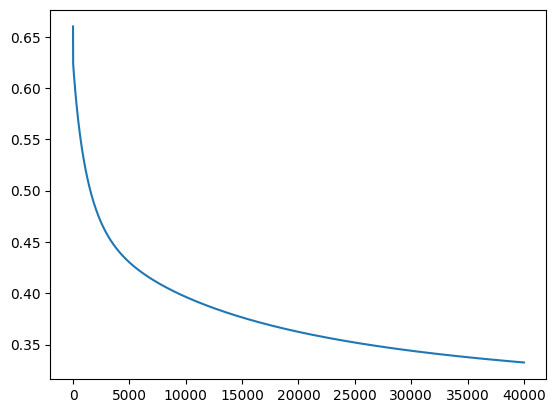

In [87]:
import matplotlib.pyplot as plt 

plt.plot(tracking_cost)

In [88]:
predictions = []

for sample in test_data:
    temp = model_estimate(sample, w, b)

    if temp > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

ids = ids.to_numpy()
predictions = np.array(predictions)

output = np.column_stack((ids, predictions))
print(output)

output = pd.DataFrame(output, columns = ["PassengerId", "Survived"])
output.to_csv("titanic_predictions_v2.csv", index = False)

[[ 892    0]
 [ 893    0]
 [ 894    0]
 [ 895    0]
 [ 896    1]
 [ 897    0]
 [ 898    1]
 [ 899    0]
 [ 900    1]
 [ 901    0]
 [ 902    0]
 [ 903    0]
 [ 904    1]
 [ 905    0]
 [ 906    1]
 [ 907    1]
 [ 908    0]
 [ 909    0]
 [ 910    0]
 [ 911    1]
 [ 912    1]
 [ 913    0]
 [ 914    1]
 [ 915    0]
 [ 916    1]
 [ 917    0]
 [ 918    1]
 [ 919    0]
 [ 920    0]
 [ 921    0]
 [ 922    0]
 [ 923    0]
 [ 924    1]
 [ 925    0]
 [ 926    0]
 [ 927    0]
 [ 928    1]
 [ 929    0]
 [ 930    0]
 [ 931    0]
 [ 932    0]
 [ 933    1]
 [ 934    0]
 [ 935    1]
 [ 936    1]
 [ 937    0]
 [ 938    0]
 [ 939    0]
 [ 940    1]
 [ 941    1]
 [ 942    0]
 [ 943    0]
 [ 944    1]
 [ 945    1]
 [ 946    0]
 [ 947    0]
 [ 948    0]
 [ 949    1]
 [ 950    0]
 [ 951    1]
 [ 952    0]
 [ 953    0]
 [ 954    0]
 [ 955    1]
 [ 956    1]
 [ 957    1]
 [ 958    1]
 [ 959    0]
 [ 960    0]
 [ 961    1]
 [ 962    1]
 [ 963    0]
 [ 964    1]
 [ 965    1]
 [ 966    1]
 [ 967    0]
 [ 968    0]

### Pre - Built Models (Advanced)
The purpose of this Jupyter notebook is to demonstrate feature engineering and see the custom, self - implemented, logistic regression model at work. However, for the sake of achieving a good score, more complex and advanced models must be tried. In the future, I may use the pre - built Decision Tree model which should theoretically achieve a higher success rate.